In [4]:
import cv2 as cv
import matplotlib.pyplot as plt

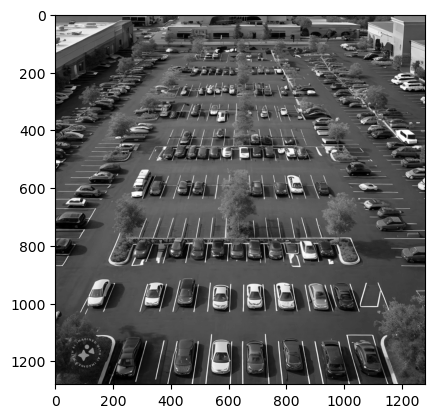

In [5]:
# Leer la imagen en escala de grises
imagen = cv.imread('Estacionamiento1.jpeg', 0)

plt.imshow(imagen, cmap = 'gray')

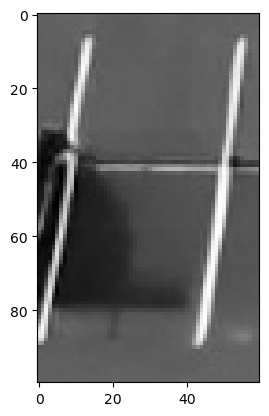

In [16]:
prueba = imagen[550:650, 510:570]
plt.imshow(prueba, cmap = 'gray')

In [ ]:
import cv2
import numpy as np

# Cargar la imagen
image = cv.imread('Estacionamiento1.jpeg')

# Convertir la imagen a escala de grises
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Aplicar desenfoque para reducir el ruido
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Usar la detección de bordes de Canny para encontrar los bordes
edges = cv2.Canny(blurred, 50, 150)

# Encontrar contornos en la imagen
contours, _ = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Configuración de tamaño mínimo y máximo para los espacios de estacionamiento
min_area = 500
max_area = 5000

for contour in contours:
    # Calcular el área del contorno
    area = cv2.contourArea(contour)
    if min_area < area < max_area:
        # Aproximar el contorno para verificar si es rectangular
        epsilon = 0.05 * cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, epsilon, True)
        
        if len(approx) == 4:  # Si el contorno tiene 4 lados, podría ser un espacio de estacionamiento
            # Crear una máscara para el contorno y verificar si está ocupado o libre
            mask = np.zeros(gray.shape, dtype="uint8")
            cv2.drawContours(mask, [contour], -1, 255, -1)
            
            # Calcular el valor promedio dentro del contorno para determinar si está libre (por ejemplo, si es oscuro está ocupado)
            mean_val = cv2.mean(gray, mask=mask)[0]
            
            if mean_val > 100:  # Ajusta este valor umbral según la iluminación de la imagen
                # Espacio libre (pintar borde en verde)
                cv2.drawContours(image, [contour], -1, (0, 255, 0), 3)
            else:
                # Espacio ocupado (pintar borde en rojo)
                cv2.drawContours(image, [contour], -1, (0, 0, 255), 3)

# Mostrar la imagen resultante
cv2.imshow("Parking Detection", image)
cv2.waitKey(0)
cv2.destroyAllWindows()
